# Finding the Max Sharpe Ratio Portfolio

In [34]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize 
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
def msr(riskfree_rate, er, cov):
    """
    Risk Free Rate + ER + COV --> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n    # Tuple of tuples
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    # Minimize the negative sharpe ratio, to maximize the sharpe ratio
    # Must define the negative sr function within this same definition
    
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the Sharpe ratio given the weights, er, and covariance matrix
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args = (riskfree_rate, er, cov,), method = "SLSQP",
                       options = {'disp': False},
                       constraints = (weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

<AxesSubplot:xlabel='Volatility'>

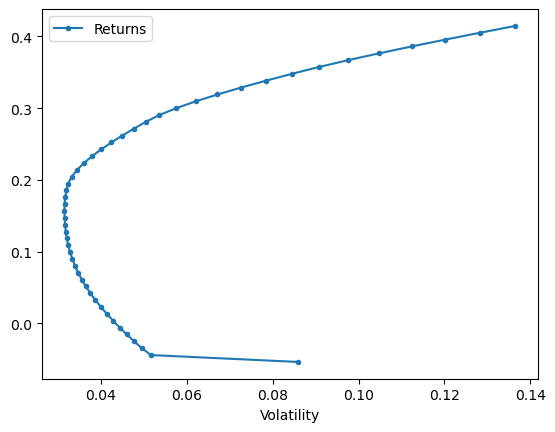

In [42]:
# TO view the efficient frontier of all 30 asset classes

erk.plot_ef(50, er, cov)

(0.0, 0.14178366262388878)

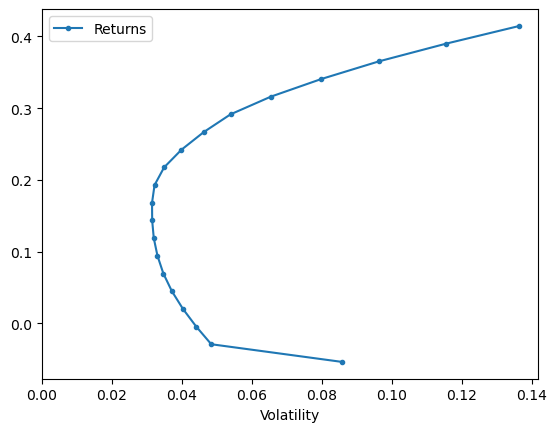

In [37]:
# dropping into matplotlib to change the left most boundary to zero
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

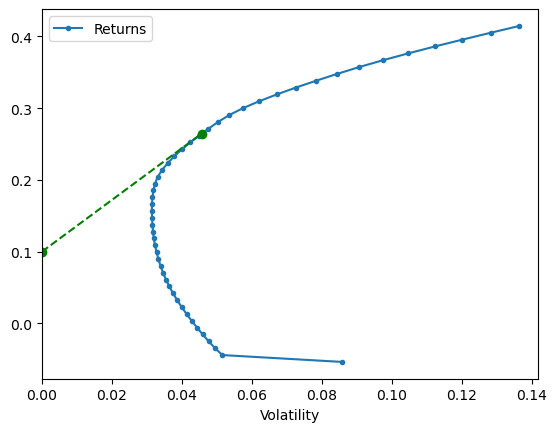

In [38]:
ax = erk.plot_ef(50, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
weights_msr = msr(rf, er, cov)
returns_msr = erk.portfolio_return(weights_msr, er)
vol_msr = erk.portfolio_vol(weights_msr, cov)
# To add the capital market line
cml_x = [0, vol_msr]
cml_y = [rf, returns_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

<AxesSubplot:xlabel='Volatility'>

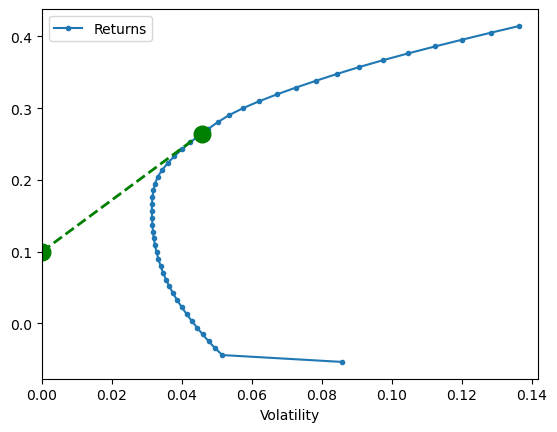

In [39]:
 erk.plot_ef(50, er, cov, show_cml=True, riskfree_rate = 0.1)

In [40]:
weights_msr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.26068589e-15, 6.04292296e-16, 6.55168425e-16, 4.55961458e-01,
       0.00000000e+00, 3.43324178e-15, 1.65535127e-15, 0.00000000e+00,
       2.78724050e-15, 2.33810831e-01, 0.00000000e+00, 0.00000000e+00,
       1.11002480e-15, 1.38704160e-01, 5.18492932e-16, 8.94091863e-02,
       1.31367062e-15, 2.59636252e-16, 1.55177127e-02, 0.00000000e+00,
       0.00000000e+00, 8.79452710e-16, 6.65966515e-02, 8.53398078e-16,
       0.00000000e+00, 2.64676839e-15])